Если что, это Python 2.
Если у Вас что-то не запускается, не ставьте нули, пожалуйста, а напишите kvn505@ya.ru

В начале загрузим необходимые пакеты, в том числе math для расчета экспоненты и statistics для расчета среднего и дисперсии.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import exp
from statistics import mean, variance
%matplotlib inline

Возьмем логнормальное распределение https://ru.wikipedia.org/wiki/Логнормальное_распределение
$$f_{X}(x)={\frac  {1}{x\sigma {\sqrt  {2\pi }}}}e^{{-(\ln x-\mu )^{2}/2\sigma ^{2}}}$$

Зададим параметры $\mu$ и $\sigma > 0$ и сгенерируем выборку в 1000 наблюдений.

In [2]:
# зададим параметры теоретического распределения
mu = 0.0
sigma = 0.5

# зададим логнормально распределенную случайную величину согласно справке пакета scipy
lognorm_rv = sts.lognorm(s = sigma, scale = exp(mu))

# сгенерируем 1000 значений
sample = lognorm_rv.rvs(size = 1000)

Построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения нашей случайной величины. Нас в задании просят, чтобы величины были в одном масштабе, выставить у гистограммы значение параметра normed=True. Однако теперь этот параметр вместо normed называется density, иначе питон выдает warning

Text(0,0.5,'fraction of samples & $f(x)$')

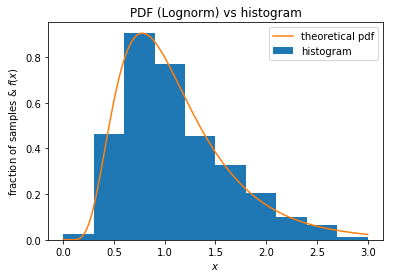

In [3]:
# строим гистограмму
plt.hist(sample, range = (0,3), density = True, label='histogram')
# задаем аргумент для плотности
x = np.linspace(0,3,1000)
# рассчитываем значения плотности
pdf = lognorm_rv.pdf(x)
# строим график
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.title("PDF (Lognorm) vs histogram")
plt.xlabel('$x$')
plt.ylabel('fraction of samples & ' + '$f(x)$')

Теперь напишем функцию, которая будет строить гистограмму распределения средних с наложенной теоретической плотностью нормального закона. В переменную theor_mean записывается теоретическое матожидание нормального распределения согласно ЦПТ. Определим функцию draw_hist_means с аргументами n (= 5, 10, 50) - объем генерируемых выборок и m = 1000 - число выборок для генерации.

In [4]:
theor_mean = exp(mu + (sigma**2.)/2.)

def draw_hist_means(n, m = 1000):
    # генерируем 1000 выборок объемом n
    samples = np.array([lognorm_rv.rvs(size = n) for i in range(m)])
    # вычисляем средние по каждой из сгенерированных выборок и записываем в вектор means
    means = np.array([mean(samples[i]) for i in range(m)])
    # считаем теоретическую дисперсию согласно ЦПТ - она зависит от n
    theor_disp = ((exp(sigma**2.) - 1.) * exp(2.*mu + sigma**2.))/n
    # выведем значения теоретических параметров нормального закона
    print 'Параметры нормального распределения, аппроксимирующие выборочные средние: \nE[X] = ' + str(theor_mean) + ', D[X] = ' + str(theor_disp)
    # строим гистограмму распределения средних
    plt.hist(means, density = True, label='histogram')
    # задаем аргумент для теоретической плотности
    x = np.linspace(0, 3, 1000)
    # задаем нормально распределенную случайную величину с рассчитанными параметрами - передаем в нее матожидание 
    # и среднеквадратическое отклонение
    norm_rv = sts.norm(theor_mean, theor_disp**(1./2))
    # вычисляем значения плотности
    pdf_norm = norm_rv.pdf(x)
    # строим график плотности
    plt.plot(x, pdf_norm, label='theoretical pdf')
    plt.xlabel('$x$')
    plt.ylabel('fraction of samples & ' + '$f(x)$')
    plt.legend()

Для справки: теоретические параметры матожидания и дисперсии логнормального закона согласно Википедии: $E[X] = e^{\mu +\sigma ^{2}/2}$, $D[X] = (e^{\sigma^2}-1) e^{2\mu +\sigma^2}$

Нарисуем требуемый график при n = 5:

Параметры нормального распределения, аппроксимирующие выборочные средние: 
E[X] = 1.13314845307, D[X] = 0.0729391708025


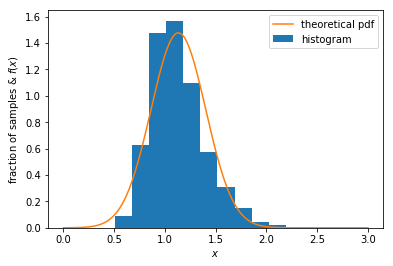

In [5]:
draw_hist_means(5)

Нарисуем требуемый график при n = 10:

Параметры нормального распределения, аппроксимирующие выборочные средние: 
E[X] = 1.13314845307, D[X] = 0.0364695854012


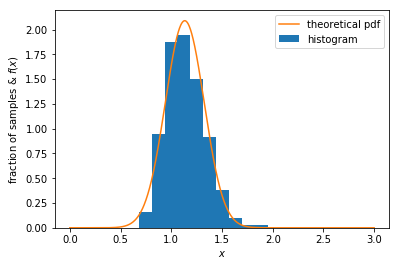

In [6]:
draw_hist_means(10)

Наконец, график при n = 50:

Параметры нормального распределения, аппроксимирующие выборочные средние: 
E[X] = 1.13314845307, D[X] = 0.00729391708025


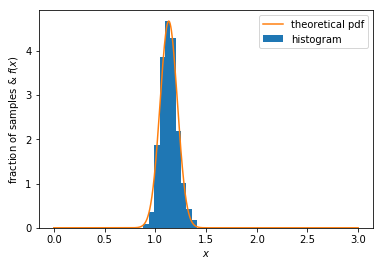

In [7]:
draw_hist_means(50)

# Вывод
Таким образом, с увеличением объема выборки распределение средних более точно описывается нормальным законом согласно ЦПТ. Гистограмма становится более "узкой", вытягивается вверх вокруг среднего, поскольку с увеличением n дисперсия (разброс) уменьшается.

В работе все пункты выполнены:
- есть код, генерирующий выборки и графики;
- есть краткие описания каждого блока кода, объясняющие, что он делает;
- есть необходимые графики (оси на них подписаны);
- есть выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n: перед каждым графиком моя функция выводит рассчитанные значения соответствующих параметров;
- есть выводы по результатам выполнения задания.